<a href="https://colab.research.google.com/github/RSeth-Creator/Data/blob/dataScience/NLP_S4_FeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Feature Engineering 

In [1]:
#Mounting the drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import & Clean the data 

In [6]:
# Importing the required libraries
import pandas as pd 
import re
import string 
import nltk 
from nltk import WordNetLemmatizer
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
nltk.download('wordnet')
wnl = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
data = pd.read_csv("drive/My Drive/SMSSpamCollection.tsv",sep = '\t', header = None)
data.columns = ['labels', 'body_text']
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,labels,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


Create function for the preprocessing 




> Features of the text 


* Length of the text field
* Percentage of the characters that are punctuation in the text 
* percentage of the characters that are capitalized


> Transformation 

1.   Power Transformation 
2.   Stadardizing data (Skewed data  to log-normal data)




















## Feature Creation 

We will create the length of the messages . The hypothesis for that is : punctuation in a  spam message is more than the normal message.

In [7]:
# length of character = len(string)- count of white-spaces
data['body_len']=data['body_text'].apply(lambda x :len(x)-x.count(" "))

In [17]:
data.head(2)

,labels,body_text,body_len,punct%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7


# Create  feature for % of txt  that is punctuation

In [9]:
import string 

In [18]:
#Creating a function to fin dout the % of punctuation present in the text
def count_punct(text):
  count = sum([1 for char in text if char in string.punctuation])
  return round(count/(len(text) - text.count(" ")), 3)*100
    
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

data.head(2)

,labels,body_text,body_len,punct%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7


We can Find the other feature from the text 


1.   Number(or %) of capitalize word
2.   Number(or %) alpha numeric word 

1.   Number of pronoun etc





## Evaluation of the new created features 

In [19]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

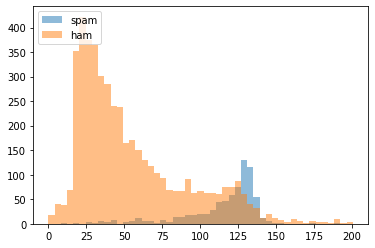

In [26]:
pyplot.hist(data[data['labels']=='spam']['body_len'],bins = np.linspace(0,200.40),alpha = 0.5,label='spam')   
pyplot.hist(data[data['labels']=='ham']['body_len'],bins = np.linspace(0,200.40),alpha = 0.5,label='ham')    
pyplot.legend(loc='upper left')        
pyplot.show()              




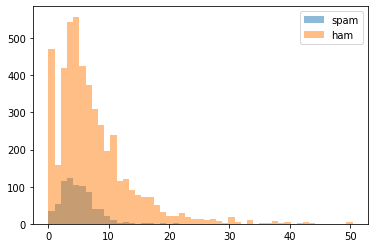

In [27]:
pyplot.hist(data[data['labels']=='spam']['punct%'],bins = np.linspace(0,50.40),alpha = 0.5,label='spam')   
pyplot.hist(data[data['labels']=='ham']['punct%'],bins = np.linspace(0,50.40),alpha = 0.5,label='ham')    
pyplot.legend(loc='upper right')        
pyplot.show()              


## Feature Engineering & Transformation

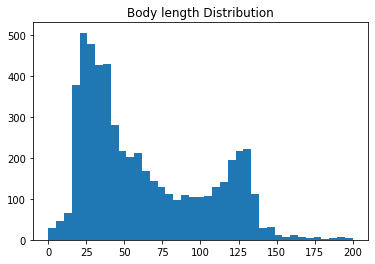

In [58]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline
bins = np.linspace(0,200,40)
pyplot.hist(data['body_len'],bins)
pyplot.title('Body length Distribution')
pyplot.show()

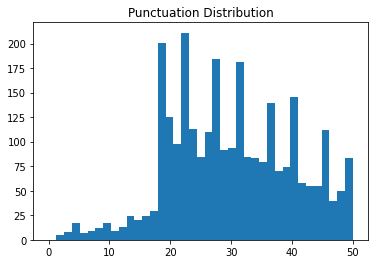

In [59]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline
bins = np.linspace(0,50,40)
pyplot.hist(data['body_len'],bins)
pyplot.title('Punctuation Distribution')
pyplot.show()

## Box-CoX power Transformation 

1.   Determine what range of exponents to test 
2.   Apply each transformation to each value to your choosen feature

1.   Use some criteria to determine which of the transformation yeild to best distribution 






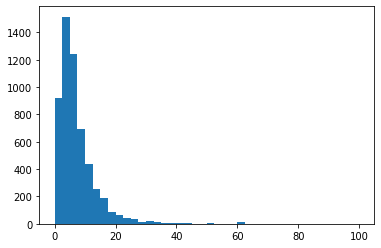

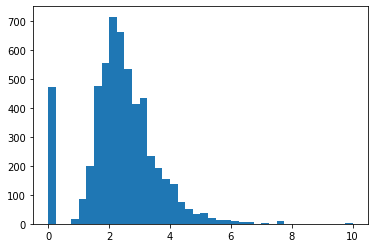

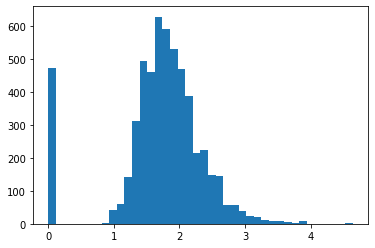

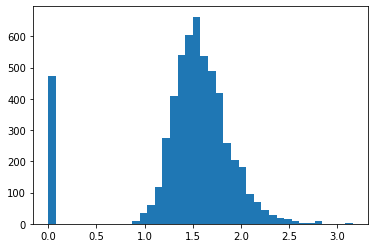

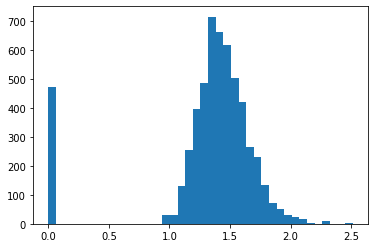

In [70]:
import string
for i in [1,2,3,4,5]:
  pyplot.hist((data['punct%'])**(1/i),bins = 40)
  #pyplot.title("Transformation: 1/{}".format(str(int(i))))
  pyplot.show()